In [16]:
import os, glob
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
input_dir  = r"H:\data\EuroSATallBands\ds\images\remote_sensing\otherDatasets\sentinel_2\tif\\"
output_dir = r"H:\data\SR\FSRCNN\EuroSAT\\"
covers = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]
count = 1
#covers = covers[2:4]
for cover in covers:
    filenames = glob.glob(os.path.join(input_dir, cover, "*.tif"))
    #filenames = filenames[0:2]
    for filename in filenames:
        with rasterio.open(filename, 'r+') as r:
            image = r.read().astype('float32')
            ir = image[7]
            imin, imax = np.percentile(ir, [1,99])
            ir[ir > imax] = imax
            ir[ir < imin] = imin
            ir = (ir - imin) / (imax - imin)
            I = Image.fromarray((ir * 255).astype(np.uint8))
            I.save(os.path.join(output_dir, "EU_{}.bmp".format(count)))
            count = count + 1

In [6]:
ir.shape

(64, 64)

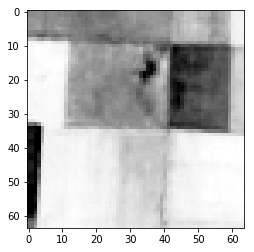

In [9]:
plt.imshow(ir, cmap="Greys")

In [10]:
ir

array([[0.5422911 , 0.5422911 , 0.53057706, ..., 0.0957795 , 0.11162791,
        0.07717485],
       [0.5422911 , 0.5422911 , 0.53057706, ..., 0.0957795 , 0.11162791,
        0.07717485],
       [0.4981912 , 0.4981912 , 0.50577086, ..., 0.09991387, 0.10887166,
        0.08682171],
       ...,
       [0.7269595 , 0.7269595 , 0.6098191 , ..., 0.06752799, 0.0585702 ,
        0.07166236],
       [0.64840657, 0.64840657, 0.53333336, ..., 0.12678725, 0.10956072,
        0.11989664],
       [0.64496124, 0.64496124, 0.4416882 , ..., 0.13850129, 0.12747632,
        0.13712317]], dtype=float32)